# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt




In [3]:
file_efficiency_obs = "E1_Efficiency_Obs.csv"
df=pandas.read_csv(file_efficiency_obs,sep=',')
print(df.head()) # to observe brand 1
print(df.tail()) # to observe brand 2
print(f"Shape of dataframe : {df.shape}")

     Brand  Concentration  Efficiency
0  Brand_1         3.9479      3.2224
1  Brand_1         1.7838      1.5127
2  Brand_1         7.4415      4.3736
3  Brand_1         8.5625      5.2151
4  Brand_1         9.8002      5.4256
      Brand  Concentration  Efficiency
65  Brand_2        0.80066      3.5650
66  Brand_2        5.05470      4.5253
67  Brand_2        6.58950      5.3607
68  Brand_2        2.14950      3.8577
69  Brand_2        9.97490      6.7319
Shape of dataframe : (70, 3)


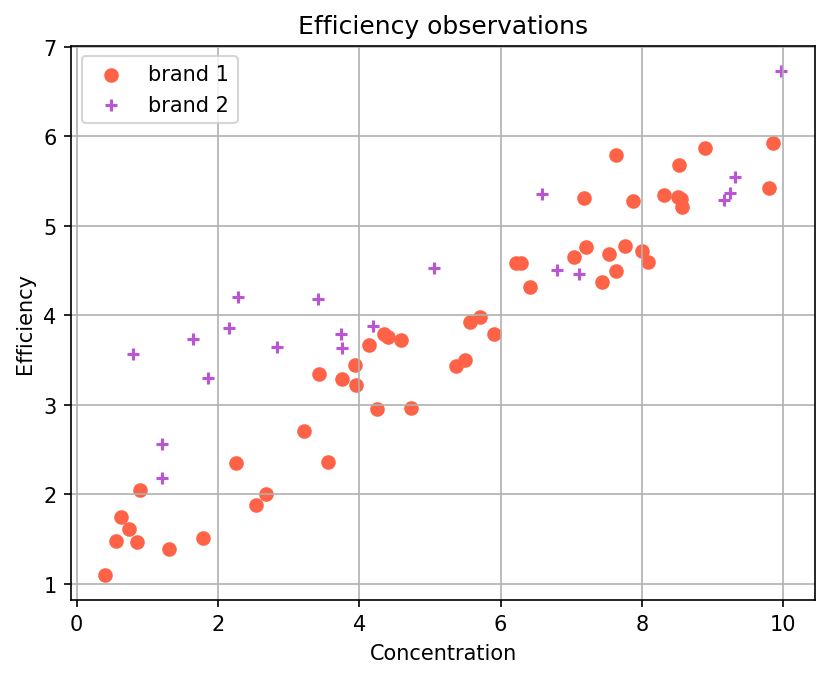

"\nEn observant les données brutes, on s'aperçoit produit a un effet assez marqué sur les moteurs Brand_1 et \nBrand_2, car les valeurs de rendement varient fortement en fonction de la concentration. La tendance est que \nle rendement augmente en fonction de la concentration de produit.\nLes unités du rendement et de la concentration sont inconnues. On suppose que le rendement est exprimé de façon \nnon standard, puisqu'il est fréquemment supérieur à 1.\nEn affichant un scatterplot des données, il apparait que la relation efficacité / concentration est à peu près linéaire\npour chaque moteur.\n"

In [4]:
# extract efficiency and product concentration for each motor brand.
c_brand_1 = df[df["Brand"] == "Brand_1"]["Concentration"]
e_brand_1 = df[df["Brand"] == "Brand_1"]["Efficiency"]

c_brand_2 = df[df["Brand"] == "Brand_2"]["Concentration"]
e_brand_2 = df[df["Brand"] == "Brand_2"]["Efficiency"]


# a plot to get a clearer idea of the effect of the product by brand
plt.figure(dpi=150)
plt.scatter(c_brand_1, e_brand_1, color="tomato", marker="o", label="brand 1")
plt.scatter(c_brand_2, e_brand_2, color="mediumorchid", marker="+", label="brand 2")
plt.xlabel("Concentration")
plt.ylabel("Efficiency")
plt.grid()
plt.legend()
plt.title("Efficiency observations")
plt.show()

# question answer
"""
En observant les données brutes, on s'aperçoit produit a un effet assez marqué sur les moteurs Brand_1 et 
Brand_2, car les valeurs de rendement varient fortement en fonction de la concentration. La tendance est que 
le rendement augmente en fonction de la concentration de produit.
Les unités du rendement et de la concentration sont inconnues. On suppose que le rendement est exprimé de façon 
non standard, puisqu'il est fréquemment supérieur à 1.
En affichant un scatterplot des données, il apparait que la relation efficacité / concentration est à peu près linéaire
pour chaque moteur.
"""

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

In [5]:
"""
Étant donné que l'on suppose une relation linéaire entre l'entrée et la sortie, et que le bruit est Gaussien centré,
on appliquera une régression linéaire sur chacun des deux jeu de données brand_1 et brand_2.

TRAIN/ TEST / VALIDATION ??
OUTLIERS ?
"""


"\nÉtant donné que l'on suppose une relation linéaire entre l'entrée et la sortie, et que le bruit est Gaussien centré,\non appliquera une régression linéaire sur chacun des deux jeu de données brand_1 et brand_2.\n\nTRAIN/ TEST / VALIDATION ??\nOUTLIERS ?\n"

In [6]:
# import functions used for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
"""
function to fit data for each brand.
Args :
    lr      : LinearRegression object
    x       : array, input data
    y       : array, output data
    plot    : bool, wether to plot the results
    info    : a string to add on plots
Returns :
    y_hat   : predicted y
    msq     : mean square error
lr object having been previously instanciated, coefficient are stored inside.
"""
def LinReg(lr, x, y, plot=True, info:str=""):
    # copy and expand dimensions
    x0 = np.zeros(x.shape).reshape(-1, 1)
    x0[:, 0] = x[:]
    y0 = np.zeros(y.shape)
    y0[:] = y[:]

    # fit model
    lr.fit(x0, y0)
    # compute predicted y using model
    y_hat = lr.predict(x0)
    # compute mean square error
    msq = mean_squared_error(y0, y_hat)
    if plot :
        # plot
        plt.figure(dpi=150)
        plt.scatter(x0, y0, color="orchid", marker="o", label=f"data {info}")
        plt.plot(x0, y_hat, color="dodgerblue", marker="", label=f"linear reg {info}\nintercept: {lr.intercept_}\nslope: {lr.coef_[0]}")
        plt.xlabel("Concentration")
        plt.ylabel("Efficiency")
        plt.grid()
        plt.legend()
        plt.title(f"Computed linear regression for {info}")
        plt.show()
    return y_hat, msq

"""
Function that simply displays the result of a linear regression.
Ars :
    msq : mean squared error
    lr : LinearRegression object
"""
def DisplayLinearResults(lr, msq):
    print("\n **** \n")
    print(f"Mean square error for first linear regression is {msq}.")
    print(f"Slope of model (eg impact of product on efficiency) is roughly {round(lr.coef_[0]*100, 1)} %.")
    return None


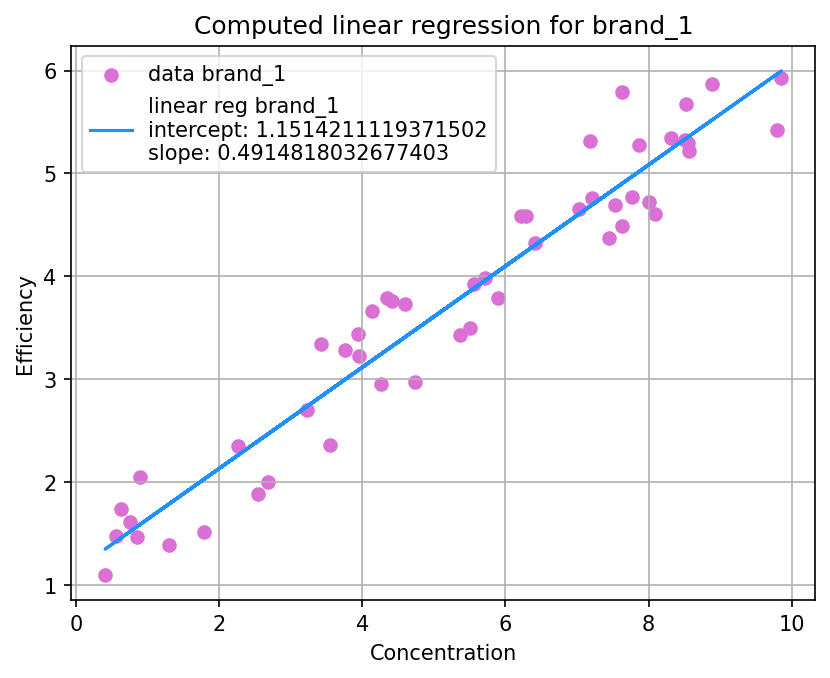

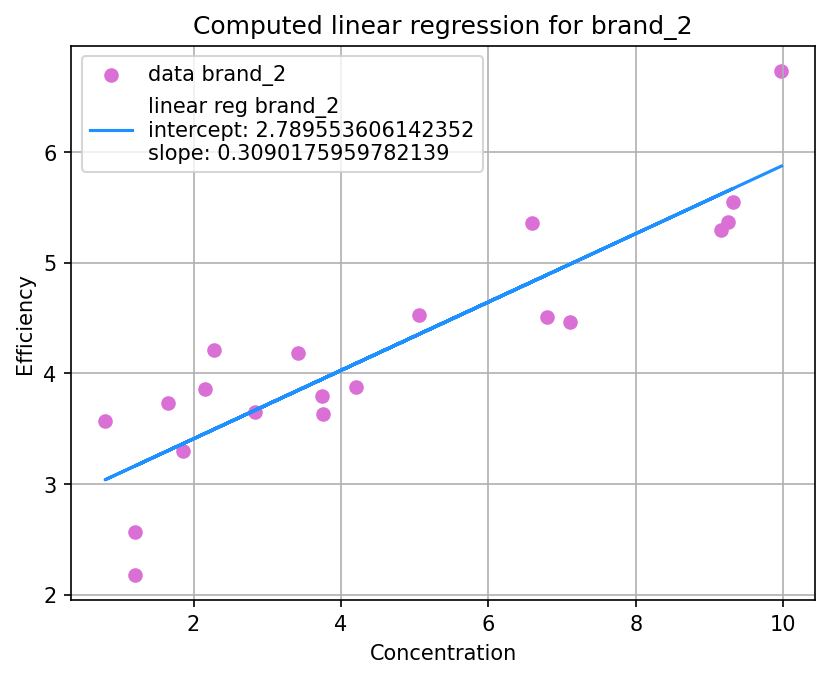


 **** 

Mean square error for first linear regression is 0.12887409752130752.
Slope of model (eg impact of product on efficiency) is roughly 49.1 %.

 **** 

Mean square error for first linear regression is 0.2216057613258669.
Slope of model (eg impact of product on efficiency) is roughly 30.9 %.


In [8]:

# instanciate a LinearRegression object for each brand
lr1 = LinearRegression()
lr2 = LinearRegression()

# solve and plot
_, msq1 = LinReg(lr1, c_brand_1, e_brand_1, plot=True, info="brand_1")
_, msq2 = LinReg(lr2, c_brand_2, e_brand_2, plot=True, info="brand_2")
# print results
DisplayLinearResults(lr1, msq1)
DisplayLinearResults(lr2, msq2)

In [9]:
"""
Dans les deux régression linéaires effectuées, la pente obtenue est non nulle, et est comprise entre 0.3 et 0.5. 
Le produit a donc un impact important sur l'efficacité, 

QUANTIFICATION DE L'ERREUR
"""

"\nDans les deux régression linéaires effectuées, la pente obtenue est non nulle, et est comprise entre 0.3 et 0.5. \nLe produit a donc un impact important sur l'efficacité, \n\nQUANTIFICATION DE L'ERREUR\n"

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

In [10]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing



In [ ]:


"""
POURQUOI DANS DES PANDAS ? JUSTIF
load rapide, colonne, explicite, permet l'analyse rapide
"""


# define files path
file_sensor = "E2_sensor_vals.csv"
file_stress = "E2_stress_vals.csv"
# load data into df
df_sensor = pandas.read_csv(file_sensor,sep=';')
df_stress = pandas.read_csv(file_stress,sep=',')

# quick analysis
print(df_sensor.head())
print(f"Shape of sensor dataframe : {df_sensor.shape}")

print(df_stress.head())
print(f"Shape of sensor dataframe : {df_stress.shape}")
print(f"max {np.max(df_stress["Stress"])}, min {np.min(df_stress["Stress"])}")

# conclusion of quick analysis
"""
On a 
    17 capteurs
    64 observations par capteur
    64 mesures de stress
Chaque mesure de stress est un entier positif entre 3 et 19
Chaque mesure d'un capteur est un flottant ~1 ou ~10 (positif ou négatif)
"""
pass  # else vscode prints all text in the cell


   sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  sensor_06  \
0       10.8        7.1       4.10        7.9       14.2       9.67   
1       10.8        7.1       5.58        7.7       12.5       9.93   
2       10.8        6.1       4.26        6.6       14.6      15.64   
3       11.0        4.4       3.37        5.5       13.3       8.31   
4       11.0        4.8       3.86        5.6       13.0       7.52   

   sensor_07  sensor_08  sensor_09  sensor_10  sensor_11  sensor_12  \
0      32.16      15.15  14.113333       0.24     0.2858  -3.092822   
1      28.30      11.90  11.180000       0.32     0.6628  -3.201752   
2      32.20       8.93   8.926667       0.44    -0.9030 -10.828537   
3      29.55      14.42  12.980000       0.26    -0.1893  -1.695580   
4      20.38       9.17   7.453333       0.19     0.6871  -4.242367   

   sensor_13  sensor_14   sensor_15  sensor_16  sensor_17  
0       9.57       0.24   72.131613       4.34       3.77  
1       8.00       0.29   

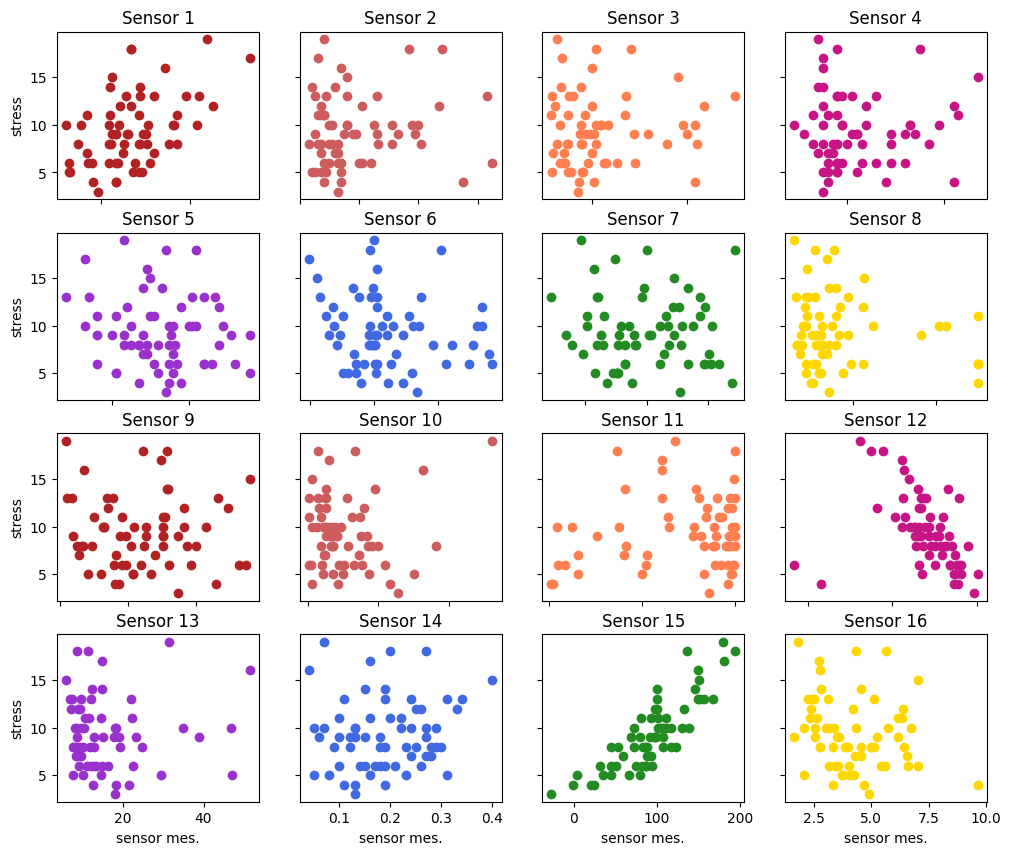

In [30]:

# value in X and y dataset
X = df_sensor.to_numpy(dtype=np.float32)
y = df_stress.to_numpy(dtype=np.float32)

# plot a*b randomly chosen or selection of sensors
a, b = 4, 4
plotted_sensors = np.random.randint(0, 16, a*b)
plotted_sensors = np.arange(0, 16, 1)
fig, axs = plt.subplots(a, b)
fig.set_figheight(10)
fig.set_figwidth(12)
colors = ["firebrick", "indianred", "coral", "mediumvioletred", "darkorchid", "royalblue", "forestgreen", "gold"]
for i in range(a):
    for j in range(b):
        s = b*i + j # plot number
        axs[i, j].scatter(X[:, plotted_sensors[s]], y, color=colors[s%len(colors)])
        axs[i, j].set_title(f"Sensor {plotted_sensors[s]+1}")
for ax in axs.flat:
    ax.set(xlabel='sensor mes.', ylabel='stress')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


In [ ]:
"""
À première vue, les capteurs qui semblent corrélés à l'usure des ailes sont les capteurs :
    1 : les points sont pour la plupart au dessus d'une droite de pente a1 > 0.
    On peut supposer une relation de type stress > a1*mesurement1 + b1.
    
    11 : les points sont en partie en dessous d'une droite de pente a11 > 0. La corrélation est moins nette que pour les autres graphes.
    On peut supposer une relation de type stress < a11*mesurement11 + b11.
    
    12 : les points sont pour la plupart au dessus d'une droite de pente a12 < 0.
    On peut supposer une relation de type stress > -|a12|*mesurement12 + b12.
    
    15 : les points sont autour d'une droite de pente a15 > 0.
    On peut supposer une relation de type stress = a15*mesurement15 + b15.
"""


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


In [ ]:
# simple linear regression

"""
function to fit data for each 3 sensors.
Args :
    lr      : LinearRegression object
    x       : array, input data
    y       : array, output data
    plot    : bool, wether to plot the results
    info    : a string to add on plots
Returns :
    y_hat   : predicted y
    msq     : mean square error
lr object having been previously instanciated, coefficient are stored inside.
"""
def MultiLinReg(lr, X, y, index, plot=True, info:str=""):
    # copy data and extract
    n_var = len(index)
    X0 = np.zeros((X.shape[0], n_var))
    X0[:, :] = X[:, index] # X0 : [n_samples,n_features]
    y0 = np.zeros(y.shape)
    y0[:] = y[:]

    # fit model
    lr.fit(X0, y0)
    # compute predicted y using model
    y_hat = np.zeros((X0.shape[0], n_var))
    y_hat[:, :] = lr.predict(X0)
    # compute mean square error
    msq = np.zeros(n_var)
    for i in range(n_var) :
        msq[i] = mean_squared_error(y0, y_hat[:, i])
    # plot if required
    if plot :
        fig, axs = plt.subplots(n_var)
        fig.set_figheight(10)
        fig.set_figwidth(12)
        colors = ["firebrick", "indianred", "coral", "mediumvioletred", "darkorchid", "royalblue", "forestgreen", "gold"]
        for i in range(n_var):
            axs[i].scatter(X[:, index[i]], y, color=colors[s%len(colors)])
            axs[i].plot(X[:, index[i]], y_hat[:, i], color="black")
            axs[i].set_title(f"Sensor {index[i]+1} and corresponding linear regression")
        for ax in axs.flat:
            ax.set(xlabel='sensor mes.', ylabel='stress')
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axs.flat:
            ax.label_outer()

    return y_hat, msq


# instanciate a LinearRegression object for each sensor
lr_3sensors = LinearRegression()

# solve and plot
# INDEXING START AT 0
_, msq_3_sensors = MultiLinReg(lr_3sensors, X, y, index=[0, 11, 14], plot=True, info="brand_1")


ValueError: Found input variables with inconsistent numbers of samples: [3, 64]



#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.



### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.



### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?

